In [1]:
import pickle
import pandas as pd
import os
import numpy as np
import import_ipynb 
from feeds import BackFeed,DataFeed
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
from decision_tree import DecisionTree
from dataclasses import dataclass
from add_features import add_features

importing Jupyter notebook from feeds.ipynb
importing Jupyter notebook from synfeed.ipynb
importing Jupyter notebook from india_calendar.ipynb
importing Jupyter notebook from featfuncs.ipynb


In [2]:
@dataclass
class OptimalData:
    optD: dict
    optR: dict
    optDT: dict
    optRT: dict
    feed_original: pd.DataFrame
    feed_all: pd.DataFrame

In [3]:
path = os.path.join('additional_utils', 'optimal_alldata_new.pkl')
with open(path, 'rb') as f:
    optimal_data = pickle.load(f)

In [4]:
def trainDT(X_train, X_test, y_train, y_test, cols_to_use, y_col, max_depth=2):
    # Fit the classifier with default hyper-parameters
    labels = ['sell', 'buy']
    clf = DecisionTreeClassifier(max_depth=max_depth)
    model = clf.fit(X_train, y_train)
    
    # DOT data
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=cols_to_use,
                                    class_names=labels,
                                    filled=True)
    # Draw graph
    graph = graphviz.Source(dot_data, format="png")
    preds = clf.predict(X_test)
    cm = pd.DataFrame(confusion_matrix(y_test, preds), columns=labels, index=labels)
    report = classification_report(y_test, preds, target_names=labels)
    
    return graph, cm, report

In [5]:
def get_data(df):
    df, pre_discrete_cols, discrete_cols = add_features(df)
    
    df = df[df['Action']!=-5]
    
    
    COLS_TO_USE =  [col for col in discrete_cols]
    y_col='Action'

    n = len(df)
    X = df.loc[:, COLS_TO_USE]
    y = df.loc[:, y_col]

    return df, X, y, COLS_TO_USE, y_col, pre_discrete_cols, discrete_cols

In [6]:
dfs = [optimal_data.feed_original, optimal_data.feed_all]

In [7]:
df1, X1, y1, COLS_TO_USE, y_col, pre_discrete_cols, discrete_cols  = get_data(dfs[0])

In [8]:
df1 = df1.dropna()
indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(axis=1)
df1 = df1[indices_to_keep]
X1 = df1.loc[:, COLS_TO_USE]
y1 = df1.loc[:, y_col]

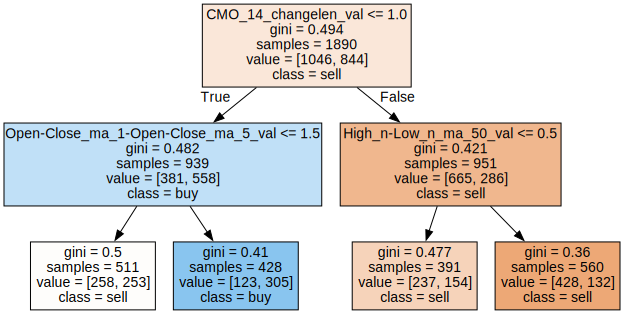

In [9]:
graph, cm, report = trainDT(X1, X1, y1, y1, COLS_TO_USE, y_col=y_col, max_depth=2)
graph

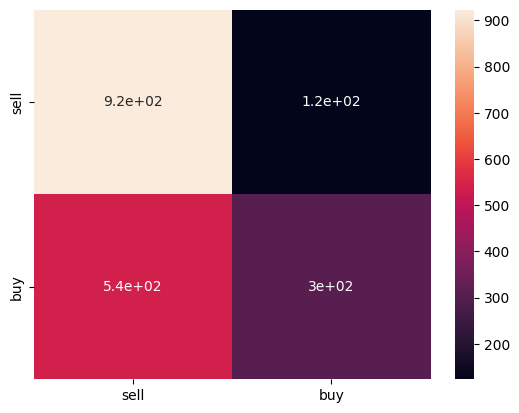

In [10]:
sns.heatmap(cm, annot=True);

In [11]:
print(report)


              precision    recall  f1-score   support

        sell       0.63      0.88      0.74      1046
         buy       0.71      0.36      0.48       844

    accuracy                           0.65      1890
   macro avg       0.67      0.62      0.61      1890
weighted avg       0.67      0.65      0.62      1890



In [12]:
from decision_tree import DecisionTree

In [13]:
dt = DecisionTree(max_depth=2)
dt.train(X1, y1)

[INFO] Trained Tree!


In [14]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.63      0.88      0.74      1046
           1       0.71      0.36      0.48       844

    accuracy                           0.65      1890
   macro avg       0.67      0.62      0.61      1890
weighted avg       0.67      0.65      0.62      1890



In [15]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         CMO_14_changelen_val >= 2
                                                                                                         Gini: 0.4942885137594133
                                                                                                         Samples: 1890
                                                                                                         Values: {-1: 1046, 1: 844}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   High_n-Low_n_ma_50_val >= 1            

In [20]:
dt.prune(impurity_thresh=0.47, set_action=0)

[INFO] Prune leaf with index: 4 as                           impurity=0.4774694043079257>=thresh=0.47
[INFO] Prune leaf with index: 6 as                           impurity=0.4999521294725434>=thresh=0.47
[INFO] Pruning complete!


In [21]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         CMO_14_changelen_val >= 2
                                                                                                         Gini: 0.4942885137594133
                                                                                                         Samples: 1890
                                                                                                         Values: {-1: 1046, 1: 844}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   High_n-Low_n_ma_50_val >= 1            

In [22]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.76      0.41      0.53      1046
           0       0.00      0.00      0.00         0
           1       0.71      0.36      0.48       844

    accuracy                           0.39      1890
   macro avg       0.49      0.26      0.34      1890
weighted avg       0.74      0.39      0.51      1890



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
dt.save('saved_models/dt_optimal_alldata_original.pkl')

In [7]:
df2, X2, y2, COLS_TO_USE, y_col, pre_discrete_cols, discrete_cols  = get_data(dfs[1])

In [8]:
df2 = df2.dropna()
indices_to_keep = ~df2.isin([np.nan, np.inf, -np.inf]).any(axis=1)
df2 = df2[indices_to_keep]
X2 = df2.loc[:, COLS_TO_USE]
y2 = df2.loc[:, y_col]

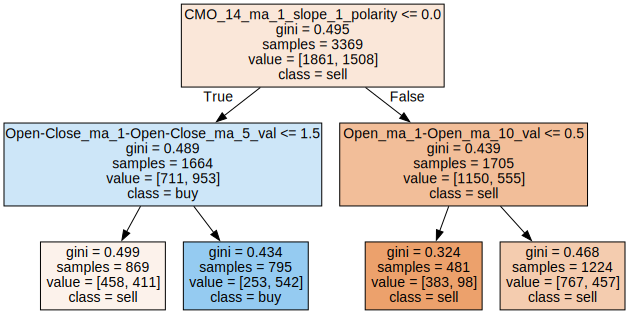

In [28]:
graph, cm, report = trainDT(X2, X2, y2, y2, COLS_TO_USE, y_col=y_col, max_depth=2)
graph

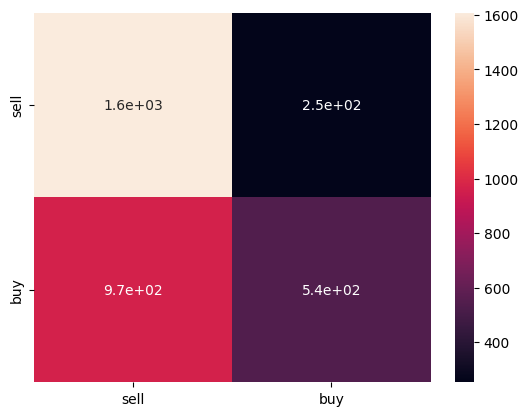

In [29]:
sns.heatmap(cm, annot=True);

In [30]:
print(report)


              precision    recall  f1-score   support

        sell       0.62      0.86      0.73      1861
         buy       0.68      0.36      0.47      1508

    accuracy                           0.64      3369
   macro avg       0.65      0.61      0.60      3369
weighted avg       0.65      0.64      0.61      3369



In [31]:
from decision_tree import DecisionTree

In [32]:
dt = DecisionTree(max_depth=2)
dt.train(X2, y2)

[INFO] Trained Tree!


In [33]:
dt.score(X2, y2)

              precision    recall  f1-score   support

          -1       0.62      0.86      0.73      1861
           1       0.68      0.36      0.47      1508

    accuracy                           0.64      3369
   macro avg       0.65      0.61      0.60      3369
weighted avg       0.65      0.64      0.61      3369



In [34]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         CMO_14_slope_1_polarity >= 1
                                                                                                         Gini: 0.49451069460600605
                                                                                                         Samples: 3369
                                                                                                         Values: {-1: 1861, 1: 1508}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   Open_ma_1-Open_ma_10_val >= 1     

In [35]:
dt.prune(impurity_thresh=0.46, set_action=0)

[INFO] Pruned leaf with index: 3 as impurity=0.46792766670938524>=thresh=0.46
[INFO] Prune leaf with index: 6 as                           impurity=0.49853739798533026>=thresh=0.46
[INFO] Pruning complete!


In [36]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         CMO_14_slope_1_polarity >= 1
                                                                                                         Gini: 0.49451069460600605
                                                                                                         Samples: 3369
                                                                                                         Values: {-1: 1861, 1: 1508}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   Open_ma_1-Open_ma_10_val >= 1     

In [37]:
dt.score(X2, y2)

              precision    recall  f1-score   support

          -1       0.80      0.21      0.33      1861
           0       0.00      0.00      0.00         0
           1       0.68      0.36      0.47      1508

    accuracy                           0.27      3369
   macro avg       0.49      0.19      0.27      3369
weighted avg       0.75      0.27      0.39      3369



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
dt.save('saved_models/dt_optimal_alldata_all.pkl')

In [9]:
from decision_tree import DecisionTree

In [10]:
dt = DecisionTree(max_depth=3)
dt.train(X2, y2)

[INFO] Trained Tree!


In [11]:
dt.score(X2, y2)

              precision    recall  f1-score   support

          -1       0.65      0.82      0.72      1861
           1       0.67      0.44      0.53      1508

    accuracy                           0.65      3369
   macro avg       0.66      0.63      0.63      3369
weighted avg       0.66      0.65      0.64      3369



In [12]:
dt.visualize()

                                                                                                                                                                                                                                                     Index: 0
                                                                                                                                                                                                                                                     CMO_14_slope_1_polarity >= 1
                                                                                                                                                                                                                                                     Gini: 0.49451069460600605
                                                                                                                                                                                                         

In [13]:
dt.prune(impurity_thresh=0.47, set_action=0)

[INFO] Prune leaf with index: 8 as                           impurity=0.4999906298607597>=thresh=0.47
[INFO] Prune leaf with index: 12 as                           impurity=0.4831320283215327>=thresh=0.47
[INFO] Pruned leaf with index: 13 as impurity=0.488448>=thresh=0.47
[INFO] Prune leaf with index: 14 as                           impurity=0.49057184838749235>=thresh=0.47
[INFO] Pruning complete!


In [14]:
dt.visualize()

                                                                                                                                                                                                                                                     Index: 0
                                                                                                                                                                                                                                                     CMO_14_slope_1_polarity >= 1
                                                                                                                                                                                                                                                     Gini: 0.49451069460600605
                                                                                                                                                                                                         

In [15]:
dt.score(X2, y2)

              precision    recall  f1-score   support

          -1       0.70      0.56      0.62      1861
           0       0.00      0.00      0.00         0
           1       0.70      0.35      0.46      1508

    accuracy                           0.46      3369
   macro avg       0.47      0.30      0.36      3369
weighted avg       0.70      0.46      0.55      3369



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
dt.save('saved_models/dt_optimal_alldata_all_depth_3.pkl')